In [3]:
import json
# The Python standard library includes some functionality for communicating
# over the Internet.
# However, we will use a more powerful and simpler library called requests.
# This is external library that you may need to install first.
import requests


def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )


    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)

def count_earthquakes(data):
    """Get the total number of earthquakes in the response."""
    return data["metadata"]["count"]


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]


def get_location(earthquake):
    """Retrieve the latitude and longitude of an earthquake item."""
    coordinates = earthquake["geometry"]["coordinates"]
    # There are three coordinates, but we don't care about the third (altitude)
    return (coordinates[0], coordinates[1])


def get_maximum(data):
    """Get the magnitude and location of the strongest earthquake in the data."""
    current_max_magnitude = get_magnitude(data["features"][0])
    current_max_location = get_location(data["features"][0])
    for item in data["features"]:
        magnitude = get_magnitude(item)
        # Note: what happens if there are two earthquakes with the same magnitude?
        if magnitude > current_max_magnitude:
            current_max_magnitude = magnitude
            current_max_location = get_location(item)
    return current_max_magnitude, current_max_location
    # There are other ways of doing this too:
    # biggest_earthquake = sorted(data["features"], key=get_magnitude)[0]
    # return get_magnitude(biggest_earthquake), get_location(biggest_earthquake)
    # Or...
    # biggest_earthquake = max(
    #     ({"mag": get_magnitude(item), "location": get_location(item)}
    #     for item in data["features"]),
    #     key=lambda x: x["mag"]
    # )
    # return biggest_earthquake["mag"], biggest_earthquake["location"]


# With all the above functions defined, we can now call them and get the result
data = get_data()
print(f"Loaded {count_earthquakes(data)}")
max_magnitude, max_location = get_maximum(data)
print(f"The strongest earthquake was at {max_location} with magnitude {max_magnitude}")

Loaded 120
The strongest earthquake was at (-2.15, 52.52) with magnitude 4.8


In [4]:
import datetime

def year_of_time(time):
    """Get the year of a time string."""
    return datetime.datetime.fromtimestamp(time / 1000).year

def year_of_earthquake(earthquake):
    """Get the year of an earthquake item."""
    return year_of_time(earthquake["properties"]["time"])
# year_of_earthquake(data["features"][50])

In [5]:
def freq_earthquakes_per_year(data):
    years = {}
    for earthquake in data["features"]:
        #check years for key year_of_earthquake(earthquake)
        year = year_of_earthquake(earthquake)
        if year in years.keys():
            years[year] += 1
        else:
            years[year] = 1
    return years
earthquakes_per_year=freq_earthquakes_per_year(data)
earthquakes_per_year

{2000: 3,
 2001: 9,
 2002: 21,
 2003: 5,
 2004: 6,
 2005: 10,
 2006: 10,
 2007: 16,
 2008: 9,
 2009: 3,
 2010: 1,
 2011: 4,
 2013: 6,
 2014: 3,
 2015: 5,
 2017: 2,
 2018: 7}

In [18]:
def avg_earthquake_mag_by_year(data):
    earthquakes_per_year = freq_earthquakes_per_year(data)
    mags={}
    for earthquake in data["features"]:
        year = year_of_earthquake(earthquake)
        if year in mags.keys():
            mags[year_of_earthquake(earthquake)] += get_magnitude(earthquake)
        else:   
            mags[year_of_earthquake(earthquake)] = get_magnitude(earthquake)
    for year in earthquakes_per_year.keys():
        mags[year]/=earthquakes_per_year[year]
    return mags
avg_earthquake_mags = avg_earthquake_mag_by_year(data)

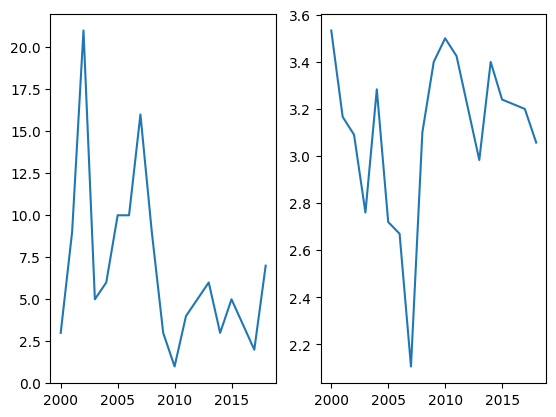

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(earthquakes_per_year.keys(),earthquakes_per_year.values())

ax2.plot(avg_earthquake_mags.keys(),avg_earthquake_mags.values())
